# Занятие 12. Проект построения модели машинного обучения для бинарной классификации

### 1. Problem Definition, Loading the libraries and the dataset

In [1]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataset = read_csv(filename, names=names)

### 2. Analyze Data

#### Descriptive Statistics

In [3]:
# shape
print(dataset.shape)

(1372, 5)


1. дисперсия изображения с вейвлет-преобразованием (непрерывная)
2. асимметрия изображения, преобразованного вейвлет (непрерывно)
3. Куртоз изображения с вейвлет-преобразованием (непрерывный)
4. энтропия изображения (непрерывная)
5. класс (целое число)

In [4]:
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)

дисперсия     float64
асимметрия    float64
эксцесс       float64
энтропия      float64
класс           int64
dtype: object


In [5]:
# head
set_option('display.width', 100)
print(dataset.head(20))

    дисперсия  асимметрия  эксцесс  энтропия  класс
0     3.62160      8.6661 -2.80730  -0.44699      0
1     4.54590      8.1674 -2.45860  -1.46210      0
2     3.86600     -2.6383  1.92420   0.10645      0
3     3.45660      9.5228 -4.01120  -3.59440      0
4     0.32924     -4.4552  4.57180  -0.98880      0
5     4.36840      9.6718 -3.96060  -3.16250      0
6     3.59120      3.0129  0.72888   0.56421      0
7     2.09220     -6.8100  8.46360  -0.60216      0
8     3.20320      5.7588 -0.75345  -0.61251      0
9     1.53560      9.1772 -2.27180  -0.73535      0
10    1.22470      8.7779 -2.21350  -0.80647      0
11    3.98990     -2.7066  2.39460   0.86291      0
12    1.89930      7.6625  0.15394  -3.11080      0
13   -1.57680     10.8430  2.54620  -2.93620      0
14    3.40400      8.7261 -2.99150  -0.57242      0
15    4.67650     -3.3895  3.48960   1.47710      0
16    2.67190      3.0646  0.37158   0.58619      0
17    0.80355      2.8473  4.34390   0.60170      0
18    1.4479

In [6]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())

       дисперсия  асимметрия   эксцесс  энтропия     класс
count   1372.000    1372.000  1372.000  1372.000  1372.000
mean       0.434       1.922     1.398    -1.192     0.445
std        2.843       5.869     4.310     2.101     0.497
min       -7.042     -13.773    -5.286    -8.548     0.000
25%       -1.773      -1.708    -1.575    -2.413     0.000
50%        0.496       2.320     0.617    -0.587     0.000
75%        2.821       6.815     3.179     0.395     1.000
max        6.825      12.952    17.927     2.450     1.000


In [8]:
# class distribution
print(dataset.groupby('класс').size())

класс
0    762
1    610
dtype: int64


#### Visualization

##### Unimodal Data Visualizations

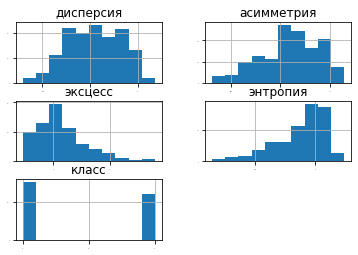

In [9]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

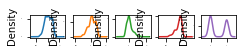

In [10]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1)
pyplot.show()

##### Multimodal Data Visualizations

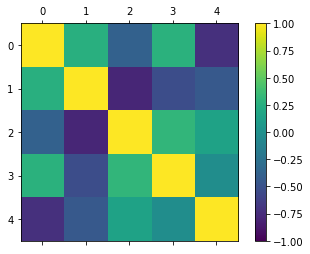

In [11]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

### 3. Validation Dataset

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4].astype(float)
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

In [13]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [14]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [15]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.991802 (0.004899)
LDA: 0.976330 (0.015849)
KNN: 1.000000 (0.000000)
CART: 0.979925 (0.008986)
NB: 0.843186 (0.027513)
SVM: 1.000000 (0.000000)


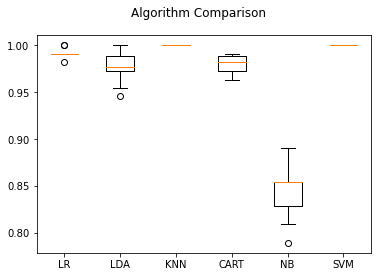

In [16]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Evaluate Algorithms: Standardize Data

In [17]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.982711 (0.011807)
ScaledLDA: 0.976330 (0.015849)
ScaledKNN: 0.997256 (0.004192)
ScaledCART: 0.979908 (0.011467)
ScaledNB: 0.843186 (0.027513)
ScaledSVM: 0.998182 (0.005455)


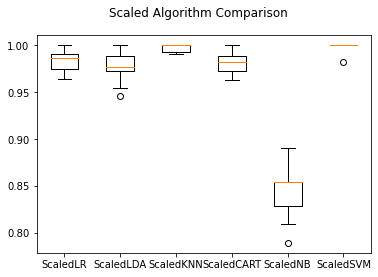

In [18]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [19]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998165 using {'n_neighbors': 3}
0.997256 (0.004192) with: {'n_neighbors': 1}
0.998165 (0.003670) with: {'n_neighbors': 3}
0.997256 (0.004192) with: {'n_neighbors': 5}
0.998165 (0.003670) with: {'n_neighbors': 7}
0.998165 (0.003670) with: {'n_neighbors': 9}
0.995438 (0.008391) with: {'n_neighbors': 11}
0.993620 (0.009141) with: {'n_neighbors': 13}
0.991810 (0.008577) with: {'n_neighbors': 15}
0.991810 (0.008577) with: {'n_neighbors': 17}
0.991810 (0.008577) with: {'n_neighbors': 19}
0.990901 (0.010757) with: {'n_neighbors': 21}


In [20]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 1.3, 'kernel': 'rbf'}
0.982711 (0.011807) with: {'C': 0.1, 'kernel': 'linear'}
0.940709 (0.026241) with: {'C': 0.1, 'kernel': 'poly'}
0.988173 (0.010793) with: {'C': 0.1, 'kernel': 'rbf'}
0.851351 (0.033958) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.986355 (0.012362) with: {'C': 0.3, 'kernel': 'linear'}
0.978140 (0.014756) with: {'C': 0.3, 'kernel': 'poly'}
0.992727 (0.008907) with: {'C': 0.3, 'kernel': 'rbf'}
0.811293 (0.037035) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.986355 (0.012362) with: {'C': 0.5, 'kernel': 'linear'}
0.987248 (0.010129) with: {'C': 0.5, 'kernel': 'poly'}
0.995455 (0.007329) with: {'C': 0.5, 'kernel': 'rbf'}
0.802185 (0.034895) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.986355 (0.012362) with: {'C': 0.7, 'kernel': 'linear'}
0.985430 (0.010911) with: {'C': 0.7, 'kernel': 'poly'}
0.997273 (0.005821) with: {'C': 0.7, 'kernel': 'rbf'}
0.793995 (0.039751) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.986355 (0.012362) with: {'C': 0.9, 'kernel': 'linear'

### 7. Ensemble Methods

In [21]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.997264 (0.004179)
GBM: 0.992694 (0.008965)
RF: 0.991802 (0.006366)
ET: 1.000000 (0.000000)


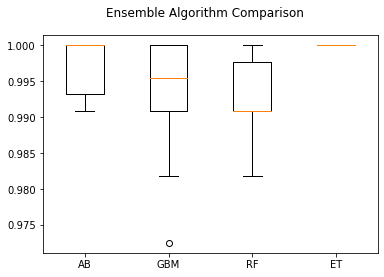

In [22]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 8. Finalize Model

In [23]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[158   0]
 [  0 117]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       158
         1.0       1.00      1.00      1.00       117

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

